In [1]:
import czsc
czsc.set_url_token(token="xR2xUWXM1imOIGQa5ERcagJ2D9B4PsOf", url="http://zbczsc.com:9106")  # 初始化自建的数据客户端，并设置缓存路径
URL="http://zbczsc.com:9106"  # tushare数据服务URL
CACHE_PATH=".quant_data_cache_zbczsc"  # 缓存路径
from datetime import datetime
date = datetime.now().strftime('%Y%m%d')
dc = czsc.DataClient(url=URL, cache_path=CACHE_PATH)      
df_cashflow = dc.cashflow_vip(ann_date=date,v="ts") 
import pandas as pd

2024-10-08 19:28:58.728 | INFO     | czsc.utils.data_client:set_url_token:23 - http://zbczsc.com:9106 数据访问凭证码已保存到 C:\Users\Bob.Fu\58d6c64cee56edba240e3e97f5b44bb1.txt
2024-10-08 19:28:58.728 | INFO     | czsc.utils.data_client:get_url_token:32 - 从 C:\Users\Bob.Fu\58d6c64cee56edba240e3e97f5b44bb1.txt 读取 http://zbczsc.com:9106 的访问凭证码
2024-10-08 19:28:58.728 | INFO     | czsc.utils.data_client:__init__:68 - 数据URL: http://zbczsc.com:9106 数据缓存路径：.quant_data_cache_zbczsc 占用磁盘空间：6.14 MB
2024-10-08 19:28:58.741 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：cashflow_vip；参数：{'ann_date': '20241008', 'v': 'ts'}；数据量：(0, 97)


# 股票研究

## 破净成份股

In [2]:
# 获取指数成份股
indexs = dc.index_dailybasic(trade_date = date,
    v="ts")

stocks = []
for sec in indexs['ts_code']:
    sec_item = dc.index_weight(index_code=sec, start_date='20240801', end_date="20240830", #trade_date='20240926', 
                                v="ts")
    stocks.append(sec_item)
stocks_df = pd.concat(stocks)
con_codes = stocks_df['con_code'].drop_duplicates(keep=False)

# 获取破净成份股
# sec_pb_list = []
# for sec in con_codes:
d = dc.daily_basic(
    # ts_code=sec,
    trade_date=date,
    v='ts')

df_pd_less_1 = d[d['pb'] < 1]
chengfengu_pd_less_1 = df_pd_less_1[df_pd_less_1['ts_code'].isin(con_codes)]
chengfengu_pd_less_1

2024-10-08 19:28:58.756 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_dailybasic；参数：{'trade_date': '20241008', 'v': 'ts'}；数据量：(12, 12)
2024-10-08 19:28:58.762 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_weight；参数：{'index_code': '000001.SH', 'start_date': '20240801', 'end_date': '20240830', 'v': 'ts'}；数据量：(2223, 4)
2024-10-08 19:28:58.764 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_weight；参数：{'index_code': '000005.SH', 'start_date': '20240801', 'end_date': '20240830', 'v': 'ts'}；数据量：(171, 4)
2024-10-08 19:28:58.767 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_weight；参数：{'index_code': '000006.SH', 'start_date': '20240801', 'end_date': '20240830', 'v': 'ts'}；数据量：(24, 4)
2024-10-08 19:28:58.775 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_weight；参数：{'index_code': '000016.SH', 'start_date': '20240801', 'end_date': '20240830', 'v': 'ts'}；数据量：(50, 4)
2024-10-

,ts_code,trade_date,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv
21,002081.SZ,20241008,3.84,3.4719,6.8630,2.35,9.9567,13.4968,0.7593,0.5051,0.5392,2.5777,2.6042,2.655324e+05,2.643439e+05,133726.3803,1.019644e+06,1.015081e+06
99,601996.SH,20241008,2.16,3.9555,6.6978,2.14,46.3091,101.3354,0.9103,1.0346,1.0934,0.0000,5.5556,1.120914e+05,1.120914e+05,66196.8416,2.421175e+05,2.421175e+05
154,600051.SH,20241008,6.54,4.7319,6.6726,2.20,19.1448,19.2142,0.6102,1.1532,1.7398,1.8349,1.8349,3.108800e+04,3.108800e+04,22046.2400,2.033155e+05,2.033155e+05
168,600676.SH,20241008,4.07,5.4261,10.1118,1.97,456.0542,NaN,0.7730,0.8034,0.8584,0.0000,NaN,1.028493e+05,1.028493e+05,55189.9254,4.185966e+05,4.185966e+05
190,601929.SH,20241008,1.55,10.6258,15.4343,1.19,NaN,NaN,0.8589,3.3817,3.4904,0.0000,NaN,3.489788e+05,3.489788e+05,240255.0804,5.409172e+05,5.409172e+05
283,603278.SH,20241008,6.57,7.9634,16.1539,2.05,23.4252,NaN,0.9991,0.4041,0.4072,0.0000,0.5288,3.417594e+04,3.417594e+04,16847.6952,2.245359e+05,2.245359e+05
288,600805.SH,20241008,4.54,4.7424,7.1877,1.95,100.7473,NaN,0.8810,1.2353,1.1148,0.0000,NaN,8.508945e+04,8.502754e+04,56101.0919,3.863061e+05,3.860250e+05
345,600758.SH,20241008,3.50,3.4393,7.5177,2.26,193.7852,NaN,0.8593,0.8268,0.8814,1.7143,NaN,1.322017e+05,1.320743e+05,60422.7803,4.627061e+05,4.622602e+05
379,601368.SH,20241008,4.88,3.0569,7.0914,2.81,58.6119,40.7442,0.9127,1.8480,1.7685,1.1475,0.5328,8.829731e+04,8.829731e+04,38062.6493,4.308909e+05,4.308909e+05
417,603776.SH,20241008,11.86,5.0905,9.0680,2.58,NaN,NaN,0.9441,4.9918,5.2892,1.0982,2.5295,2.294762e+04,2.294762e+04,12882.1587,2.721588e+05,2.721588e+05


# 可转债研究

## 可转债价值回归分析

In [3]:
# import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [4]:

cb_basic = dc.cb_basic(v='ts')
cb_basic = cb_basic[cb_basic['maturity_date']>'2024-12-31']

2024-10-08 19:28:58.997 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：cb_basic；参数：{'v': 'ts'}；数据量：(1023, 26)


In [5]:
lastday = '20241008'
closes = dc.daily(trade_date=lastday, v='ts').loc[:,['ts_code','close']]#获取正股收盘价
basic=dc.cb_basic(v='ts').loc[:,['ts_code','stk_code','conv_price', 'stk_short_name']]#基本面，获取正股代码，转股价
price_zz=dc.cb_daily(trade_date='20240930', v='ts').loc[:,['ts_code','close']]#获取转债现价
price_zz.columns=['ts_code','现价']
price_zz=price_zz.merge(basic)
price_zz=price_zz.merge(closes,left_on='stk_code',right_on='ts_code')
price_zz['转股价值']=price_zz['close']/price_zz['conv_price']*100#获取转股价值=正股收盘价/转股价*100
df_cb = price_zz.loc[:,['ts_code_x' ,'现价' ,'转股价值','stk_code', 'stk_short_name']].set_index('ts_code_x').sort_values(by='转股价值')

2024-10-08 19:28:59.023 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：daily；参数：{'trade_date': '20241008', 'v': 'ts'}；数据量：(5340, 11)
2024-10-08 19:28:59.036 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：cb_basic；参数：{'v': 'ts'}；数据量：(1023, 26)
2024-10-08 19:28:59.046 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：cb_daily；参数：{'trade_date': '20240930', 'v': 'ts'}；数据量：(536, 11)


In [6]:
df_cb['转股价值率'] = df_cb['转股价值']/df_cb['现价']

In [7]:
df_cb = df_cb.sort_values(by='转股价值率',ascending= False)


In [8]:
poly2=np.polyfit(df_cb['转股价值'].values, df_cb['现价'].values,2)  # 二次函数拟合

In [9]:
df_cb['预测值']=np.polyval(poly2,df_cb['转股价值'].values)

Text(0, 0.5, 'bond price')

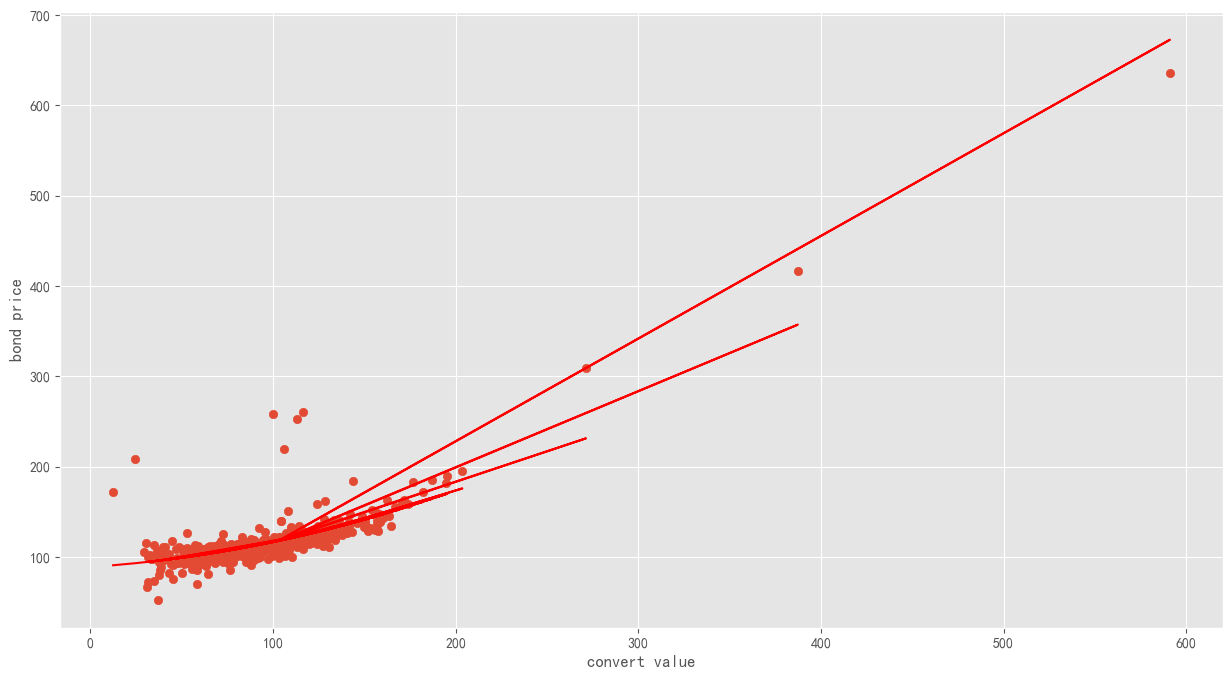

In [10]:
fig,ax=plt.subplots(1,figsize=(15,8))
plt.scatter(df_cb['转股价值'].values,df_cb['现价'].values)
plt.plot(df_cb['转股价值'].values,df_cb['预测值'].values,'-',c='r')
plt.xlabel('convert value')
plt.ylabel('bond price')

In [11]:
# 股票基本信息
stk_basic = dc.daily_basic(trade_date=lastday)

In [12]:
stk_basic['stk_code']=stk_basic['code']
df_cb = df_cb.merge(stk_basic,on='stk_code')


In [13]:
df_cb = df_cb[(df_cb['pe_ttm']>0) & (df_cb['pe_ttm']<100)]

In [14]:
df_cb = df_cb[df_cb['现价']<125]

In [ ]:
df_cb = df_cb.sort_values(by='转股价值率', ascending=False)
df_cb

## 可转债轮动

In [ ]:
cb_rate = dc.cb_rate(ts_code=['123157.SZ'], fields=['ts_code', 'coupon_rate', 'rate_freq'], v='ts')
cb_rate